## **House Price Prediction**


#### **Libraries used in this analysis**
- **pandas**: Used for data loading, manipulation, and analysis (e.g., reading CSV files, handling dataframes, checking missing values, grouping data).
- **matplotlib.pyplot**: Used for plotting data visualizations such as histograms, bar plots, and kernel density estimates.
- **sklearn.model_selection.train_test_split**: Splits the dataset into training and testing sets to evaluate model performance fairly.
- **sklearn.svm.SVC**: Implements Support Vector Classification, a powerful machine learning algorithm used here to classify customer purchase behavior.
- **sklearn.preprocessing.StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, which improves model performance.
- **sklearn.metrics.accuracy_score**: Calculates the accuracy of the classification model.
- **sklearn.metrics.confusion_matrix**: Creates a confusion matrix to evaluate classification accuracy in detail (true positives, false positives, etc.).
- **pickle**: Used to save and load the trained machine learning model for future use without retraining.


In [15]:
# Importing all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

import pickle

#### **Dataset Exploration** / **Understanding Dataset**
In this a class to handle basic exploration tasks like viewing head, tail, info, and descriptive statistics.  
Each function is kept separate for better clarity and reuse.


In [16]:
import pandas as pd

class DataExplorer:
    """
    A class for dynamic dataset exploration:
    - Automatically loads given CSV file
    - Shows head, tail, info, stats, nulls, and drop nulls
    """
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        print(f"✅ File loaded: {file_path}")

    def show_head(self):
        return self.df.head()

    def show_tail(self):
        return self.df.tail()

    def show_info(self):
        self.df.info()

    def describe_data(self):
        return self.df.describe()

# ✅ Create object and pass CSV file
explorer = DataExplorer('train.csv')  # Replace with your own file if needed

# ✅ Call all methods using the object
print("First 5 rows:")
print(explorer.show_head())


✅ File loaded: train.csv
First 5 rows:
   beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0     3    2.5  2590.0       sqft   6000.00           sqft     98144   
1     4    2.0  2240.0       sqft      0.31           acre     98106   
2     4    3.0  2040.0       sqft   3783.00           sqft     98107   
3     4    3.0  3800.0       sqft   5175.00           sqft     98199   
4     2    2.0  1042.0       sqft       NaN            NaN     98102   

       price  
0   795000.0  
1   915000.0  
2   950000.0  
3  1950000.0  
4   950000.0  


In [17]:
print("Last 5 rows:")
explorer.show_tail()

Last 5 rows:


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
2011,3,2.0,1370.0,sqft,0.5,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0
2015,3,2.0,1710.0,sqft,4267.0,sqft,98133,659000.0


In [18]:
print("Descriptive Statistics:")
explorer.describe_data()

Descriptive Statistics:


,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [19]:
print("Data Info:")
explorer.show_info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


#### **Data Cleaning**

This class is designed to clean the dataset by:

- **Checking for null values:**  
  Prints count of nulls per column and shows sample rows containing nulls.

- **Removing null values:**  
  Drops all rows with any missing data and displays the number of rows removed.

- **Checking for duplicates:**  
  Counts duplicate rows in the dataset.

- **Removing duplicates:**  
  Drops duplicate rows and shows the number of rows removed.

**Benefit of this class:**
This helps ensure the dataset is clean and ready for further analysis or modeling.


In [20]:
class DataCleaner:
    """
    Cleans the dataset by removing null values and duplicate rows.
    Shows row count and data preview after each step.
    """
    def __init__(self, dataframe):
        self.df = dataframe
        self.original_rows = dataframe.shape[0]
        print(f" Original rows: {self.original_rows}")

    def check_nulls(self):
        """Prints null count per column and previews rows with nulls."""
        nulls = self.df.isnull().sum()
        print("\n Null values per column:\n", nulls)
        print("\n Preview of rows with nulls:")
        print(self.df[self.df.isnull().any(axis=1)].head())

    def remove_nulls(self):
        """Removes rows with any null values."""
        rows_before = self.df.shape[0]
        self.df = self.df.dropna()
        rows_after = self.df.shape[0]
        print(f"\n Nulls removed: {rows_before - rows_after} rows | Remaining: {rows_after}")
        print(self.df.head())

    def check_duplicates(self):
        """Checks number of duplicate rows."""
        duplicate_count = self.df.duplicated().sum()
        print(f"\n Duplicate rows found: {duplicate_count}")

    def remove_duplicates(self):
        """Removes duplicate rows."""
        rows_before = self.df.shape[0]
        self.df = self.df.drop_duplicates()
        rows_after = self.df.shape[0]
        print(f"\n Duplicates removed: {rows_before - rows_after} rows | Remaining: {rows_after}")
        print(self.df.head())


# Usage of DataCleaner
explorer = DataExplorer("train.csv")

cleaner = DataCleaner(explorer.df)
cleaner.check_nulls()
cleaner.remove_nulls()
cleaner.check_duplicates()
cleaner.remove_duplicates()



✅ File loaded: train.csv
 Original rows: 2016

 Null values per column:
 beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

 Preview of rows with nulls:
    beds  baths    size size_units  lot_size lot_size_units  zip_code  \
4      2    2.0  1042.0       sqft       NaN            NaN     98102   
15     2    1.5   900.0       sqft       NaN            NaN     98133   
16     3    3.5  1360.0       sqft       NaN            NaN     98103   
17     1    1.0   550.0       sqft       NaN            NaN     98122   
26     1    1.0   508.0       sqft       NaN            NaN     98109   

       price  
4   950000.0  
15  549755.0  
16  700000.0  
17  330000.0  
26  325000.0  

 Nulls removed: 347 rows | Remaining: 1669
   beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0     3    2.5  2590.0       sqft   6000.00           sqft     

#### **Data Preprocessing**

This class converts all lot sizes to a consistent unit (square feet):

- Drops rows with missing lot_size or lot_size_units.
- Converts lot_size from acres to square feet where needed.
- Removes original lot_size and lot_size_units columns.
- Adds a new lot_size_sqft column with standardized values.

#### Usage:
- Initialize with cleaned data.
- Call the conversion method to preprocess.
- Output is the cleaned, standardized dataset ready for modeling.


In [21]:
class DataPreprocessor:
    """
    Preprocesses the dataset by converting mixed lot size units to square feet.
    Removes 'lot_size' and 'lot_size_units' after conversion.
    """
    def __init__(self, dataframe):
        self.df = dataframe
        print(f"\nPreprocessing started. Input rows: {self.df.shape[0]}")

    def convert_lot_size_units(self):
        """
        Converts acres to square feet and removes unit columns.
        """
        rows_before = self.df.shape[0]

        # Drop rows with missing lot_size or lot_size_units
        self.df = self.df.dropna(subset=['lot_size', 'lot_size_units']).copy()

        def convert(row):
            return row['lot_size'] * 43560 if row['lot_size_units'] == 'acre' else row['lot_size']

        self.df['lot_size_sqft'] = self.df.apply(convert, axis=1)
        self.df = self.df.drop(columns=['lot_size', 'lot_size_units'])

        rows_after = self.df.shape[0]
        print(" Preview after preprocessing:")
        print(self.df.head())


# Usage of DataPreprocessor
preprocessor = DataPreprocessor(cleaner.df)
preprocessor.convert_lot_size_units()

#  Final processed DataFrame
final_df = preprocessor.df
print(f"\n Final cleaned and preprocessed dataset shape: {final_df.shape}")




Preprocessing started. Input rows: 1660
 Preview after preprocessing:
   beds  baths    size size_units  zip_code      price  lot_size_sqft
0     3    2.5  2590.0       sqft     98144   795000.0         6000.0
1     4    2.0  2240.0       sqft     98106   915000.0        13503.6
2     4    3.0  2040.0       sqft     98107   950000.0         3783.0
3     4    3.0  3800.0       sqft     98199  1950000.0         5175.0
5     2    2.0  1190.0       sqft     98107   740000.0        43560.0

 Final cleaned and preprocessed dataset shape: (1660, 7)


#### **Statistical Analysis: Mean, Median, Mode, and Standard Deviation**

We compute basic statistical measures for each numerical column in the dataset.  
These help in understanding the central tendency and spread of the data:

- **Mean**: Average value  
- **Median**: Middle value  
- **Mode**: Most frequent value  
- **Standard Deviation (SD)**: Measure of data dispersion  


In [22]:
class Stat:
    """
    This class computes basic statistics (mean, median, mode, std)
    for all numerical columns in the DataFrame, rounded to 3 decimals.
    """
    def __init__(self, dataframe):
       self.df = dataframe.select_dtypes(include=['int64', 'float64'])
 

    def calculate(self):
        """
        Returns a dictionary with statistics for each numeric column,
        rounded to 3 decimal places.
        """
        stats_dict = {}

        for col in self.df.columns:
            stats_dict[col] = {
                'Mean': float(f"{self.df[col].mean():.3f}"),
                'Median': float(f"{self.df[col].median():.3f}"),
                'Mode': float(f"{self.df[col].mode()[0]:.3f}"),
                'Std Dev': float(f"{self.df[col].std():.3f}")
            }

        return stats_dict

# Usage
data = DataExplorer('train.csv')  
stats = Stat(data.df)
statistics_result = stats.calculate()
statistics_result



✅ File loaded: train.csv


{'beds': {'Mean': 2.858, 'Median': 3.0, 'Mode': 3.0, 'Std Dev': 1.255},
 'baths': {'Mean': 2.16, 'Median': 2.0, 'Mode': 2.0, 'Std Dev': 1.002},
 'size': {'Mean': 1735.741,
  'Median': 1560.0,
  'Mode': 2080.0,
  'Std Dev': 920.133},
 'lot_size': {'Mean': 3871.06,
  'Median': 4000.0,
  'Mode': 5000.0,
  'Std Dev': 2719.402},
 'zip_code': {'Mean': 98123.639,
  'Median': 98117.0,
  'Mode': 98115.0,
  'Std Dev': 22.651},
 'price': {'Mean': 963625.225,
  'Median': 800000.0,
  'Mode': 750000.0,
  'Std Dev': 944095.427}}

#### **Univariate Analysis**
This class provides simple plots to explore data distributions:

- Bar plots for categorical columns.
- Histograms for all numeric columns.

#### Usage:
- Initialize with the dataset.
- Call plotting methods to visualize data distributions quickly.



In [23]:
class UniPlot:
    """
    Plots univariate visualizations such as histograms, boxplots, and bar plots.
    """
    def __init__(self, dataframe):
        self.df = dataframe

    def plot_categorical(self, column):
        """
        Plots a bar chart for a categorical column.
        """
        self.df[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_histograms(self):
        """
        Plots histograms for all numeric columns.
        """
        self.df.hist(figsize=(10, 8))
        plt.tight_layout()
        plt.show()


data = DataExplorer('train.csv')

# Create UniPlot object
uni_plot = UniPlot(data.df)

✅ File loaded: train.csv


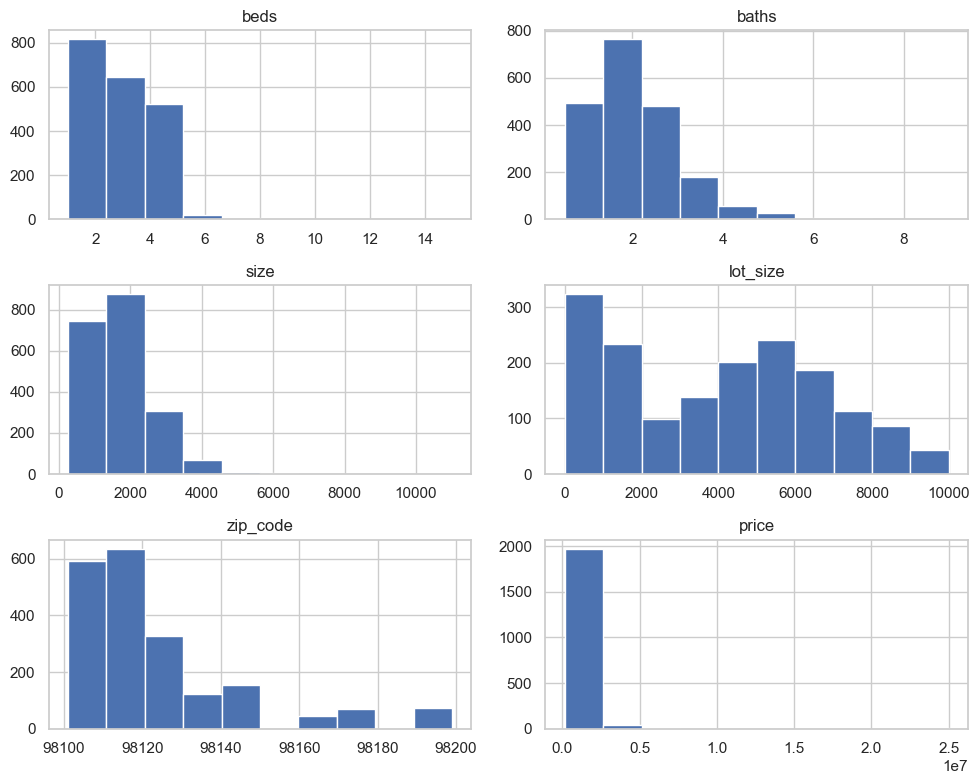

In [24]:
# Plot histograms for numeric columns
uni_plot.plot_histograms()


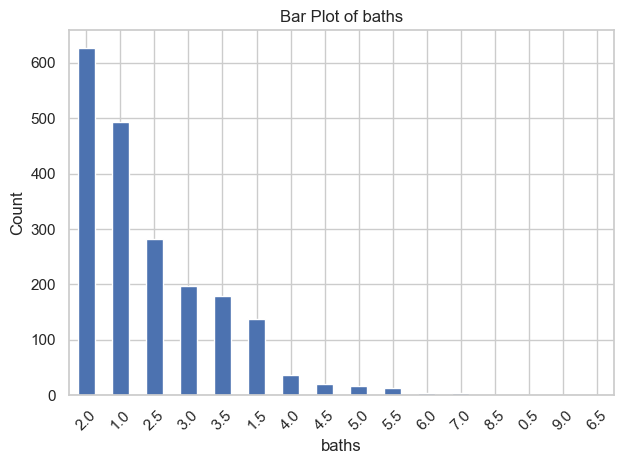

In [25]:
uni_plot.plot_categorical('baths')
# Plot bar plot for a categorical column

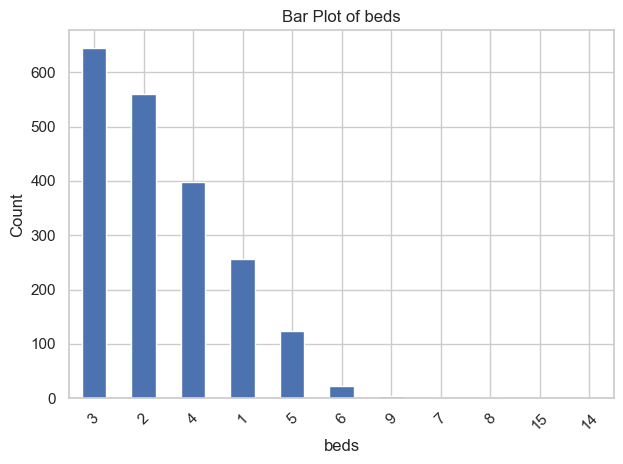

In [26]:
uni_plot.plot_categorical('beds')

#### **Bivariate Analysis**

This class provides multiple plots to explore relationships between variables:

- Bar plots for categorical features ('beds', 'zip_code').
- Scatter plot showing 'size' vs 'price'.
- Correlation heatmap for numeric features.

#### Usage:
- Initialize with the dataset.
- Call run_all() to generate all plots at once.


✅ File loaded: train.csv


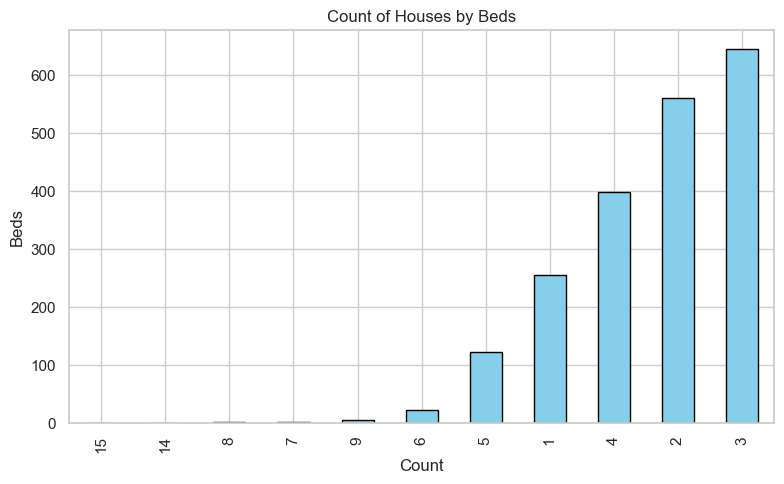

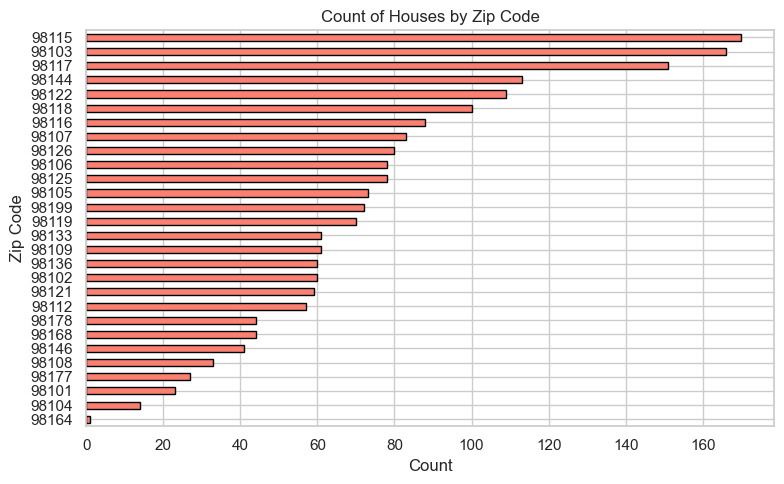

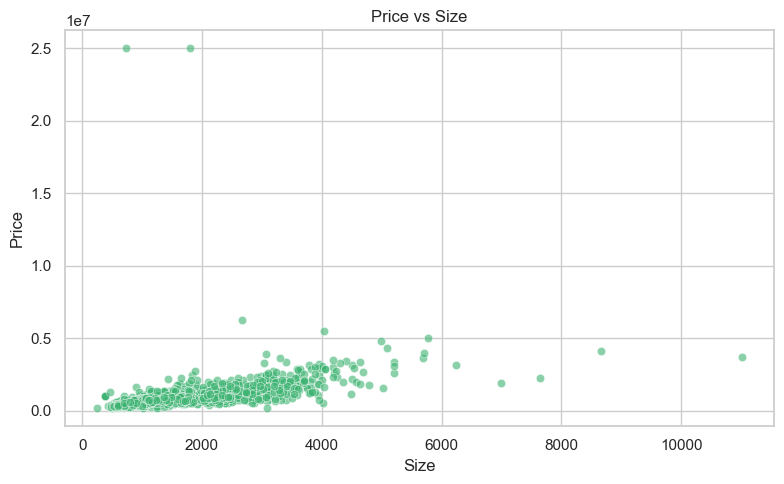

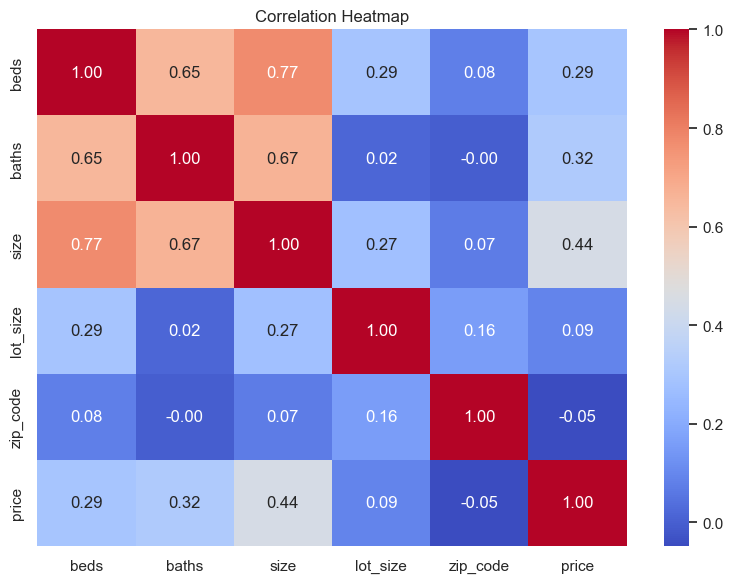

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

class BivariatePlotter:
    """
    Simple bivariate visualizations:
    - Bar plots (beds, zip_code)
    - Scatter plot (size vs price)
    - Correlation heatmap
    """
    def __init__(self, dataframe):
        self.df = dataframe
        sns.set(style="whitegrid")

    def plot_bar_beds(self):
        plt.figure(figsize=(8, 5))
        self.df['beds'].value_counts().sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title("Count of Houses by Beds")
        plt.xlabel("Count")
        plt.ylabel("Beds")
        plt.tight_layout()
        plt.show()

    def plot_bar_zip(self):
        plt.figure(figsize=(8, 5))
        self.df['zip_code'].value_counts().sort_values().plot(kind='barh', color='salmon', edgecolor='black')
        plt.title("Count of Houses by Zip Code")
        plt.xlabel("Count")
        plt.ylabel("Zip Code")
        plt.tight_layout()
        plt.show()

    def plot_scatter_size_price(self):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=self.df['size'], y=self.df['price'], color='mediumseagreen', alpha=0.6)
        plt.title("Price vs Size")
        plt.xlabel("Size")
        plt.ylabel("Price")
        plt.tight_layout()
        plt.show()

    def plot_heatmap(self):
        plt.figure(figsize=(8, 6))
        corr = self.df.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()

    def run_all(self):
        self.plot_bar_beds()
        self.plot_bar_zip()
        self.plot_scatter_size_price()
        self.plot_heatmap()






data = DataExplorer('train.csv')
plotter = BivariatePlotter(data.df)
plotter.run_all()


##### **Model Training**
**Classification Summary:**

This will builds a Support Vector Machine (SVM) model to classify houses into two categories based on their price — whether the price is above or below the median.


**Key Components and Reasons:**

1. **Price Label Creation ('add_price_label')**  
   Converts the continuous 'price' variable into a binary label ('price_label') indicating if the price is above the median or not.  
   *Reason:* Simplifies the problem to classification, making it easier to predict categories rather than exact prices.

2. **Data Splitting and Cleaning ('DataSplitter')**  
   Selects relevant features and target, removes rows with missing data, and splits the dataset into training and testing sets.  
   *Reason:* Ensures the model trains on clean data and generalizes well by evaluating on unseen test data.

3. **Classification Model ('Classification')**  
   - Scales features using 'StandardScaler' to normalize different ranges.  
   - Trains an SVM with an RBF kernel, which works well with nonlinear relationships.  
   - Predicts on test data and evaluates accuracy with detailed classification metrics.  
   *Reason:* Scaling improves model performance, and SVM provides robust classification especially with complex data patterns.

4. **Debugging ('inspect_types')**  
   Prints data types and samples of true vs predicted labels to verify prediction consistency.  
   *Reason:* Helps catch issues like data type mismatches or incorrect predictions early.


This modular and clean approach helps in easy debugging, better code reuse, and clear understanding of each step in the machine learning pipeline.

In [28]:
#  Add price_label preprocessing
def add_price_label(df, price_col='price'):
    """
    Adds a binary label column called 'price_label' based on whether 
    the price is above or below the median price.
    """
    median_price = df[price_col].median()
    df['price_label'] = (df[price_col] > median_price).astype(int)
    return df




# Data Split + Cleaning

class DataSplitter:
    """
    Cleans the dataset and splits it into training and test sets.
    """
    def __init__(self, dataframe, features, target):
        self.df = dataframe
        self.features = features
        self.target = target

    def clean_data(self):
        """
        Drops rows with missing values in the selected features and target.
        """
        self.df_cleaned = self.df[self.features + [self.target]].dropna()

    def split_data(self, test_size=0.2, random_state=42):
        """
        Splits the cleaned data into training and test sets.
        """
        X = self.df_cleaned[self.features]
        y = self.df_cleaned[self.target]
        return train_test_split(X, y, test_size=test_size, random_state=random_state)




# Classification Pipeline

class Classification:
    """
    Handles the full pipeline: scaling, training, predicting,
    and evaluating the Support Vector Machine classifier.
    """
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train.squeeze()  # Ensures labels are Series
        self.y_test = y_test.squeeze()
        self.scaler = StandardScaler()
        self.model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Radial Basis SVM

    def scale_features(self):
        """
        Standardizes training and test feature data.
        """
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)

    def train(self):
        """
        Trains the SVM model using scaled training data.
        """
        self.model.fit(self.X_train, self.y_train)

    def predict(self):
        """
        Predicts the labels for the test data using the trained model.
        """
        self.y_pred = self.model.predict(self.X_test)

    def evaluate(self):
        """
        Prints accuracy and detailed classification report.
        Returns the accuracy value.
        """
        acc = accuracy_score(self.y_test, self.y_pred)
        report = classification_report(self.y_test, self.y_pred)
        print(f"\n Accuracy: {acc:.4f}")
        print("\n Classification Report:\n", report)
        return acc

    def inspect_types(self):
        """
        Prints data types and samples for debugging prediction consistency.
        """
        print("y_test dtype:", self.y_test.dtype)
        print("y_pred dtype:", self.y_pred.dtype)
        print("y_test sample:", self.y_test[:5].tolist())
        print("y_pred sample:", self.y_pred[:5].tolist())

# Usage 


# Load dataset and generate classification label
raw_data = pd.read_csv("train.csv")
data = add_price_label(raw_data.copy())  # Adds 'price_label' column

# Specify features and target
features = ['beds', 'baths', 'size', 'lot_size', 'zip_code']
target = 'price_label'

# Clean and split the data
data_splitter = DataSplitter(data, features, target)
data_splitter.clean_data()
X_train, X_test, y_train, y_test = data_splitter.split_data()

# Build, train, and evaluate classifier
classifier = Classification(X_train, X_test, y_train, y_test)
classifier.scale_features()
classifier.train()
classifier.predict()
classifier.inspect_types()
classifier.evaluate()

y_test dtype: int32
y_pred dtype: int32
y_test sample: [0, 1, 0, 1, 0]
y_pred sample: [0, 1, 0, 0, 0]

 Accuracy: 0.7994

 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       127
           1       0.82      0.86      0.84       207

    accuracy                           0.80       334
   macro avg       0.79      0.78      0.78       334
weighted avg       0.80      0.80      0.80       334



0.7994011976047904

<!-- ### **Save Model using Pickle**
We now save the trained model using the `pickle` module for future use. -->


#### **Model Saving**

-This class 'ModelSaver' saves trained models or scalers using the pickle library for later use.

-The 'save' method serializes the given model object and writes it to a file with the specified filename.

-After training, the SVM classifier and the scaler are saved as 'svm_classifier.pkl' and 'scaler.pkl' respectively.


In [29]:
#  Saving the Model

class ModelSaver:
    """
    Saves the trained model (or scaler) using the pickle library.
    """
    def __init__(self, model, filename):
        self.model = model
        self.filename = filename

    def save(self):
        """
        Serializes and saves the model object to disk with the given filename.
        """
        with open(self.filename, 'wb') as file:
            pickle.dump(self.model, file)
        print(f" Model saved successfully as '{self.filename}'")



#  Save the trained model and scaler
saver_model = ModelSaver(classifier.model, 'svm_classifier.pkl')
saver_model.save()

saver_scaler = ModelSaver(classifier.scaler, 'scaler.pkl')
saver_scaler.save()



 Model saved successfully as 'svm_classifier.pkl'
 Model saved successfully as 'scaler.pkl'


### **Project's Descriptive Summary**

***Objective***
Build a machine learning pipeline to classify houses as **above** or **below** the median price based on key features using Support Vector Machine (SVM).

**Dataset**
The dataset contains house information with features such as:
- 'beds' (Number of bedrooms)
- 'baths' (Number of bathrooms)
- 'size' (House size in sq ft)
- 'lot_size' (Lot size in sq ft)
- 'zip_code' (Location)
- 'price' (Used to create binary labels)

**Target Variable**
A binary label 'price_label' is created:
- '1' if price > median price  
- '0' otherwise

**Model** 
- **Algorithm:** Support Vector Machine (SVM) with RBF kernel  
- **Scaling:** Features standardized using 'StandardScaler' 
- **Evaluation:** Accuracy and classification report

**Pipeline Steps**
1. Data preprocessing: cleaning and adding 'price_label'
2. Splitting dataset into train (80%) and test (20%) sets  
3. Scaling features  
4. Training the SVM model  
5. Predicting and evaluating on test data

**Model Saving**
- Trained SVM model and scaler saved as '.pkl' files for later reuse.

**Benefits**
- Modular and reusable OOP code  
- Simple binary classification approach  
- Ready for integration with web apps or further analysis  
